## Companion Notebook For Astro Hack Week Study

### Load Modules and Data Frames


#### Load Modules & Build DataFrames

In [2]:
project_dir = "/home/ubuntu/github/AstroWeekStudy/python_code/"

import sys
sys.path.append("/home/ubuntu/github/AstroWeekStudy/python_code/")

try:
    reload(loadData)
    reload(astroWeekLib)
except:
    import loadData
    import astroWeekLib
    
from loadData import *
from astroWeekLib import *


df,df2014,df2015,resampled = build_main_df()
df_users_created = prepareUserDf(df)
df_repos_created = build_df_repos_created(df2014)

ImportError: No module named loadData

### 1. Study of Repository Creations

In [138]:
#df_repos_created[(df_repos_created.index >= '2014-02-10') & (df_repos_created.index < '2014-02-25')].sort()
#wk_repos = test[(test.index >= '2014-12-15') & (test.index < '2015-03-15')]

In [117]:
repos = df_repos_created[(df_repos_created.index >= '2014-09-15') & (df_repos_created.index < '2014-11-10')].repo_url.values

In [132]:
tseries = df.type[df['repo_url'].isin(repos)].resample("1D",how="count")

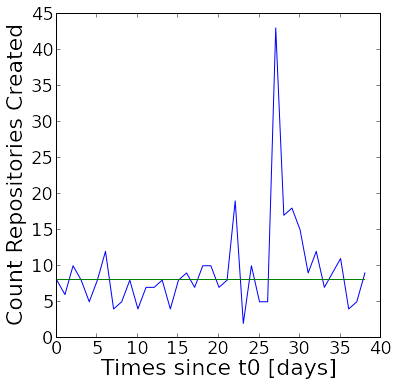

In [144]:
t3 = test[(test.index >= '2014-03-15') & (test.index < '2014-12-10')]
median_t3 =  np.median(t3)
plot(t3)
plot(np.zeros_like(t3)+median_t3)
pl.xlabel("Times since t0 [days]")
pl.ylabel("Count Repositories Created")

(-0.28296146398078997, 1.569030724925339, -0.25761240964921656, 0.080431989468881929, 0.15821330974373085)


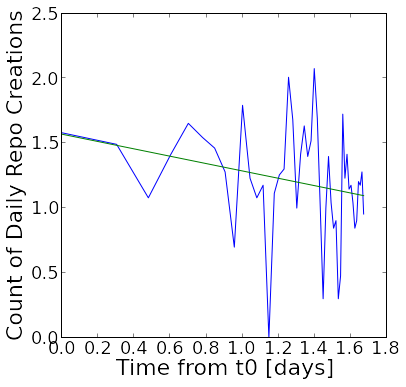

In [145]:
y = tseries.values
x = np.arange(1,len(y)+1)

c = ( y > 0 ) * (x < 50)
lx = np.log10(x[c])
ly = np.log10(y[c])

fit = S.linregress(lx,ly)
print fit
plot(lx,ly)
plot(lx,lx*fit[0]+fit[1])
xlabel("Time from t0 [days]")
ylabel("Count of Daily Repo Creations")

2008-06-22 00:00:00
(0.0051697293500473449, -0.027665496201410233, 0.77993294374488431, 1.5009673603578028e-41, 0.00029707942465396478)


(0, 2.0)

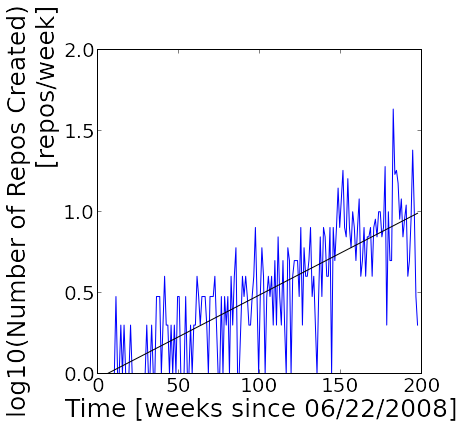

In [46]:
print test.index[0]
c = test.values > 0
x = np.arange(1,len(test.values[c])+1)
lx = np.log10(x)
ly = np.log10(test.values[c])
fit = S.linregress(x,ly)
print fit
pl.plot(x,ly)
pl.plot(x,x*fit[0]+fit[1],'k-')
pl.xlabel("Time [weeks since 06/22/2008]")
pl.ylabel("log10(Number of Repos Created) \n [repos/week]")
pl.ylim(ymin=0)

### 2. Timeline Of Activity (active repos,actors, and number of events)
Timeline showing most of 2014, with count of events, repo touched and active users, on a daily basis (one-day bins). The yellow area highlights the AstroWeek2014.

0 CreateEvent
1 PushEvent
2 PullRequestEvent
3 CommitCommentEvent
4 IssuesEvent


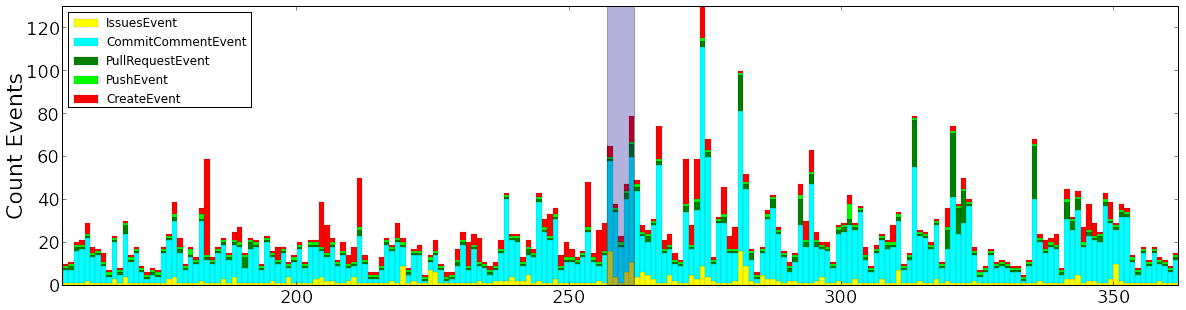

In [67]:
astro_dt = [257]

event_types = np.unique(df.type.values)
event_types_short = ['CreateEvent','PushEvent','PullRequestEvent','CommitCommentEvent','IssuesEvent']#,'IssueCommentEvent','ForkEvent','WatchEvent']
color = ['yellow','cyan','green','lime','red']#,'pink','black','goldenrod']

ax = pl.figure(1,(20,5))
y_old = np.zeros_like(resampled['event_types']['PushEvent'].values)
x = np.arange(len(y_old))
#x_tstamp = resampled['event_types']['all'].index

countAllEvents = np.array(map(float,resampled['event_types']['all'].values))


#event_types_short = event_types_short[::-1]

ratio = False

for i,e in enumerate(event_types_short):
    print i,e
    if ratio:
        y = resampled['event_types'][e].values / countAllEvents
        pl.bar(x,y,width=1,bottom=y_old,lw=0.1,color=color[i],label=e)
        y_old = y_old + y
        pl.ylim(ymax=2)
    else:
        y = resampled['event_types'][e].values
        #y[y < 1] = 1
        #ly = np.log10(y)
        pl.bar(x,y,width=1,bottom=y_old,lw=0.1,color=color[i],label=e)
        y_old = y_old + y
        #pl.ylim(ymax=10)


pl.bar(astro_dt[0],160,width=5,color="darkblue",alpha=0.3)

#pl.yscale('log')

y = resampled['event_types']['all'].values
y = (y)/np.std(y)
#pl.plot(x,y,label="all")
pl.xlim(astro_dt[0]-100,astro_dt[0]+5+100)
pl.ylim(ymax=130)
#pl.legend(["all"] + event_types_short ,loc=0)
pl.legend(event_types_short[::-1] ,loc=2)
pl.ylabel("Count Events")
#pl.xlabel("Time [days since Jan. 1, 2014]")
pl.savefig(project_dir + "figures/events_day.eps")

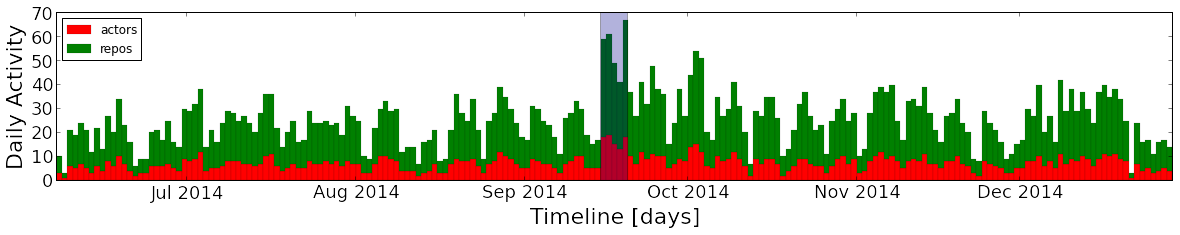

In [14]:
graph_param = {"events" : {"color": "blue"}, 
                "actors": {"color": "red"},
                "repos" : {"color": "green"}
                }

pl.figure(1,(20,3))
#show the region corresponding to astroweek

y_old = np.zeros_like(resampled['activity']['repos'].values)

opacity = 0.6
types = ["actors","repos"]
for k in types:
    y = y_old + resampled['activity'][k].values
    pl.bar(resampled['activity'][k].index,y,bottom=y_old,width=1,lw=0.1,color=graph_param[k]['color'],label=k)
    y_old = y
    #if k in ["actors","repos"]:
    #    x = resampled['activity'][k].index        
    #    for p in [50,75,90]:
    #        perc = np.percentile(resampled['activity'][k].values,p)
    #        pl.plot(x,np.zeros(len(x))+perc,'-',color=graph_param[k]['color'])

    
pl.bar(timestamp_astroweek[0],70,width=5,color="darkblue",alpha=0.3)
t = resampled['activity'][k].index
pl.xlim(t[astro_dt[0]-100],t[astro_dt[0]+5+100])
pl.ylim(ymax=70)
pl.xlabel("Timeline [days]")
pl.ylabel("Daily Activity")
pl.legend(loc=2)
pl.savefig(project_dir + "figures/activity_day.eps")

In [15]:
f, (ax1, ax2) = pl.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

events activity
	before: 43.6853448276 (26.7012551504)
	during: 69.2 (26.4378516525)
	after: 42.0144927536 (25.8973220149)
	after start: 38.8073394495 (28.6838115851)
	increase rate (during-before)/before 0.58405525407

	power law decay fit : -0.28 (r = -0.33, p = 0.00, se= 0.08)

actors activity
	before: 9.00862068966 (3.36307456226)
	during: 16.6 (2.24499443206)
	after: 8.72946859903 (3.17816390461)
	after start: 7.89908256881 (3.32338104099)
	increase rate (during-before)/before 0.842679425837

	power law decay fit : -0.22 (r = -0.42, p = 0.00, se= 0.05)

repos activity
	before: 14.7284482759 (6.54753580963)
	during: 22.2 (5.30659966457)
	after: 14.1739130435 (6.18933910079)
	after start: 12.4036697248 (5.73116262771)
	increase rate (during-before)/before 0.507287093942

	power law decay fit : -0.21 (r = -0.36, p = 0.00, se= 0.05)

repo creations: 

	power law decay fit : -0.60 (r = -0.89, p = 0.00, se= 0.10)



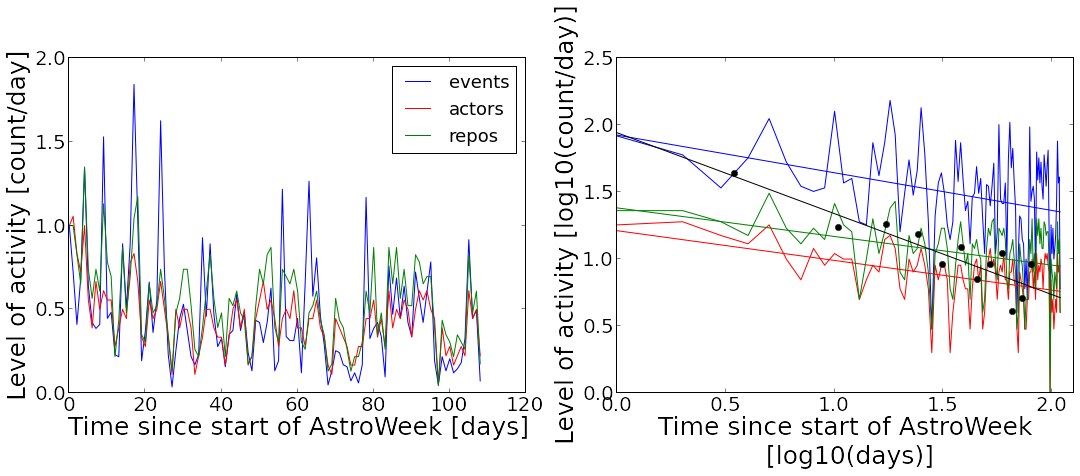

In [118]:
activity_type = ['events','actors','repos']
colors = ['blue','red','green']
tseries = {}
for i,at in enumerate(activity_type):
    print "%s activity"%at
    test = resampled['activity'][at]
    before = test[test.index >= astroweek[0]].values
    during = test[(test.index >= astroweek[0]) & (test.index < astroweek[1])].values
    after = test[(test.index > astroweek[1]) & (test.index <= time_boundaries[1])].values
    
    #after_start = test[(test.index >= astroweek[0]) & (test.index <= time_boundaries[1])].values
    after_start = test[(test.index >= astroweek[0]) & (test.index <= "2015-01-01")].values
    tseries[at] = after_start
    
    first_moment = np.mean
    
    print "\tbefore: %s (%s)"%(first_moment(before), np.std(before))
    print "\tduring: %s (%s)"%(first_moment(during), np.std(during))
    print "\tafter: %s (%s)"%(first_moment(after), np.std(after))
    print "\tafter start: %s (%s)"%(first_moment(after_start), np.std(after_start))
    print "\tincrease rate (during-before)/before %s"%((first_moment(during)-first_moment(before))/first_moment(before))
    
    pl.figure(1,(18,6))
    
    pl.subplot(121)
    pl.plot(after_start/float(after_start[0]),'-',label=at,color=colors[i])
    pl.xlabel("Time since start of AstroWeek [days]")
    pl.ylabel("Level of activity [count/day]")
    pl.legend(loc=0)
    
    pl.subplot(122)
    y = tseries[at]
    x = np.arange(1,len(y)+1)
    ly = np.log10(y)
    lx = np.log10(x)
    fit = S.linregress(lx,ly)
    print "\n\tpower law decay fit : %.2f (r = %.2f, p = %.2f, se= %.2f)\n"%(fit[0],fit[2],fit[3],fit[4])
    pl.plot(lx,ly,'-',ms =3,label=at,color=colors[i])
    pl.plot(lx,lx*fit[0]+fit[1],color=colors[i])
    

pl.subplot(122)
ly2 =  repo_decay_y#/float(max(repo_decay_y))
pl.plot(repo_decay_x,ly2,'ko',label="repos_created")
fit = S.linregress(repo_decay_x,ly2)

print "repo creations: "
print "\n\tpower law decay fit : %.2f (r = %.2f, p = %.2f, se= %.2f)\n"%(fit[0],fit[2],fit[3],fit[4])

pl.plot(lx,lx*fit[0]+fit[1],'k-',label="fit_repos_created")
pl.xlabel("Time since start of AstroWeek \n [log10(days)]")
pl.ylabel("Level of activity [log10(count/day)]")
pl.xlim(xmax=2.1)
    #pl.legend(loc=0)
pl.savefig(project_dir + "figures/relaxation.eps")

In [19]:
df_repo_created_aw = None

for r in repo_created_during_astroweek:
    try:
        df_repo_created_aw = pandas.concat([df_repo_created_aw,df[df['repo_url']==r]])
    except:
        df_repo_created_aw = df[df['repo_url']==r]
        
df_repo_created_aw.sort(inplace=True)
df_repo_created_aw = df_repo_created_aw[(df_repo_created_aw['repo_created_at'] >= astroweek[0]) & (df_repo_created_aw['repo_created_at'] < astroweek[1])]

#df_repo_created_aw = df[(df['repo_created_at'] >= astroweek[0]) & (df['repo_created_at'] < astroweek[1])]

In [17]:
def resample_df(df,t_resol="1D"):
    event_types = np.unique(df.type.values)
    event_dic = {}
    event_dic['all'] = df.type.resample(t_resol,how='count')
    event_count = df.type.resample(t_resol,how='count')
    
    for e in event_types:
        event_dic[e] = df[df['type']==e].type.resample(t_resol,how='count')
    
        if len(event_dic[e]) < len(event_count):
            event_dic[e] = fill_ommitted_resample(event_dic[e],event_count)
        
    resampled = {"activity" : 
                    {'events' : event_count,
                     'actors' : df.actor.resample(t_resol,how=countUnique),
                     'repos' : df.repo.resample(t_resol,how=countUnique)
                     },
                 'event_types' : event_dic
                }

    return resampled

In [20]:
resampled_repo_created_aw = resample_df(df_repo_created_aw)

(-0.87451697375188897, 1.735073159515117, -0.71431646737547794, 4.7432121831809793e-07, 0.14279547087132483)
(-0.59595670798244271, 1.0800439782458806, -0.7776311488033042, 9.2745078117443953e-09, 0.080305929973566281)
(-0.60073031952740319, 1.0941022962738982, -0.78522584754797053, 5.3098253927836009e-09, 0.078953485001054355)


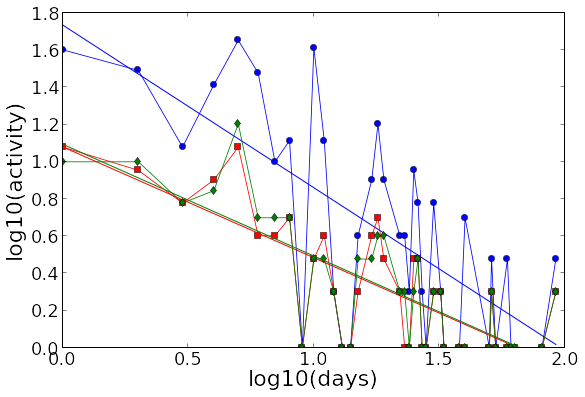

In [21]:
activity_type = ['events','actors','repos']
colors = ['blue','red','green']
markers = ['o','s','d']

figure(1,(9,6))
for i,ix in enumerate(activity_type):
    y = resampled_repo_created_aw['activity'][ix]
    x = np.arange(1,len(y)+1)
    c = (y>0)
    lx = np.log10(x[c])
    ly = np.log10(y[c])
    fit = S.linregress(lx,ly)
    print fit
    
    plot(lx,ly,marker=markers[i],lw=0.8,color=colors[i])
    #pl.bar(lx,ly,width=lx2[1:]-lx2[:-1],color=colors[i])
    plot(lx,lx*fit[0]+fit[1],'-',color=colors[i])
    pl.xlabel("log10(days)")
    pl.ylabel("log10(activity)")
    pl.ylim(ymin=0)
pl.savefig(project_dir + "figures/relaxation_aw_repos.eps")

### 3. Productive Bursts

In [147]:
def burstPlot(x,y):
    c = (y >0)*(x>0)
    lx = np.log10(x[c])
    ly = np.log10(y[c])

    fit = S.linregress(lx,ly)
    print fit

    plot(lx,ly,'o')
    plot(lx,lx*fit[0]+fit[1],'k-')
    
    return fit

(1.0715792063815721, 0.3692101491851032, 0.82470300793085649, 1.2607185455902662e-122, 0.033300100524602319)


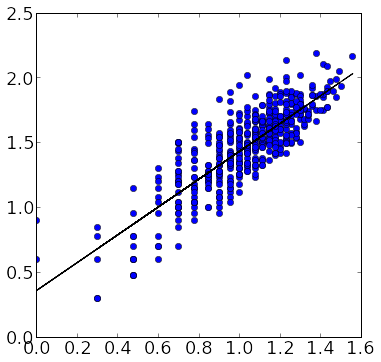

In [148]:
x = resampled['activity']['repos'].values
y = resampled['activity']['events'].values
slope = burstPlot(x,y)[0]

In [149]:
## Some Simple Test
sAE = 1.14
sAR = 1.05
sRE = 1.07

print 1.05*1.07

1.1235


In [150]:
activity_type = ['events','actors','repos']
tseries = {}
for at in activity_type:
    print "%s activity"%at
    test = resampled['activity'][at]
    before = test[test.index >= astroweek[0]].values
    during = test[(test.index >= astroweek[0]) & (test.index < astroweek[1])].values
    after = test[(test.index > astroweek[1]) & (test.index <= time_boundaries[1])].values
    after_start = test[(test.index >= astroweek[0]) & (test.index <= "2015-04-20")].values
    
    tseries[at] = {'before' : before, 'during' : during, 'after' : after, 'after_start' : after_start}

events activity
actors activity
repos activity


(1.1824403683076576, 0.46654594582292952, 0.76972281645412033, 1.0021892527750094e-46, 0.064663476424208069)


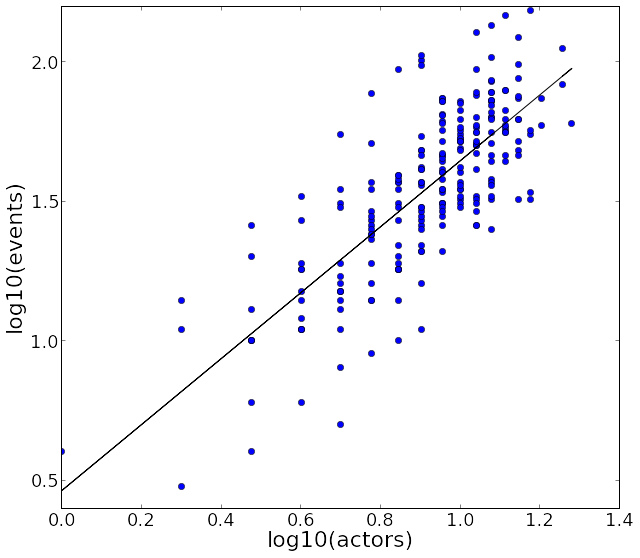

In [151]:
period = 'before'
x_type = 'actors'
y_type = 'events'
pl.figure(1,(10,9))
burstPlot(tseries[x_type][period],tseries[y_type][period])
xlabel("log10(%s)"%x_type)
ylabel("log10(%s)"%y_type)
pl.savefig(project_dir + "figures/productive_burst_before.eps")

### 4. Actor Contributions

In [153]:
ec_before = df_users_created['event_count_before'].values
ec_during = df_users_created['event_count_during'].values
ec_after = df_users_created['event_count_after'].values

(0.35572399776033786, 0.31724352263865119, 0.67643793127934493, 0.00028439770487466225, 0.082574587412843681)
(0.81556121368278456, 0.52206614373247939, 0.8645244144038795, 5.1263389102883264e-08, 0.10108402265405686)


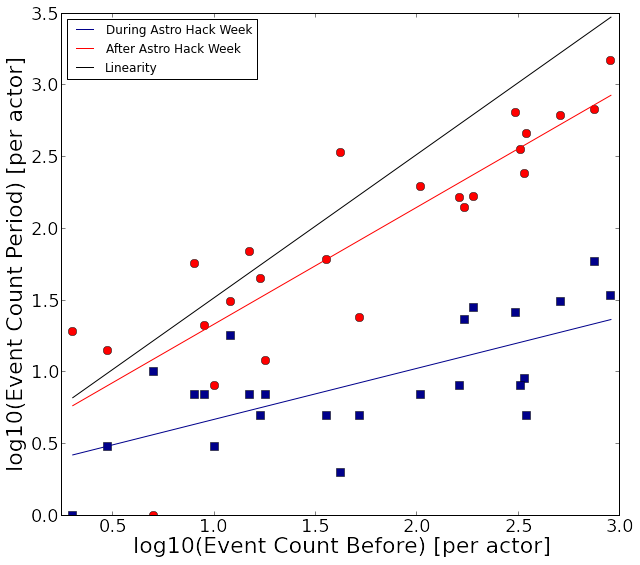

In [154]:
c = (ec_during > 0)*(ec_before > 0)*(ec_after > 0)
logBefore = np.log10(ec_before[c])
logDuring = np.log10(ec_during[c])
logAfter = np.log10(ec_after[c])

figure(1,(10,9))
fit = S.linregress(logBefore,logDuring)
print fit
pl.plot(logBefore,logDuring,'s',ms=8,color="darkblue")#,label="During Astro Hack Week")
pl.plot(logBefore,logAfter,'ro',ms=8)#,label="Period : After Astro Hack Week")
pl.plot(logBefore,logBefore*fit[0]+fit[1],'-',color="darkblue",label="During Astro Hack Week")#,label="Scaling Exp. = %.2f (std. err.=%.2f) (During AstroWeek)"%(fit[0],fit[4]

fit2 = S.linregress(logBefore,logAfter)
print fit2
#r'${\rm Damage~increment}~\Lambda$'

pl.plot(logBefore,logBefore*fit2[0]+fit2[1],'r-',label="After Astro Hack Week")#%(fit2[0],fit2[4]))
pl.plot(logBefore,logBefore+fit2[1],'k-',label="Linearity")
pl.xlabel("log10(Event Count Before) [per actor]")
pl.ylabel("log10(Event Count Period) [per actor]")
pl.xlim(xmin=0.25)
pl.legend(loc=2)
pl.savefig(project_dir + "figures/tradeoff_senior_contributors.eps")

## Misc

### Delta time between 2 modifications

In [241]:
repo_timestamp = np.array([datetime.strptime(dt,"%Y-%m-%d %H:%M:%S") for dt in df_repo_created_aw['repo_created_at']])
df_repo_created_aw['repo_timestamp'] = repo_timestamp
diff_timestamp = df_repo_created_aw.timestamp - df_repo_created_aw.repo_timestamp
df_repo_created_aw['diff_timestamp'] = diff_timestamp
df_repo_created_aw['diff_hours'] = [x.astype('timedelta64[h]')/np.timedelta64(1, 'h') for x in df_repo_created_aw['diff_timestamp']]

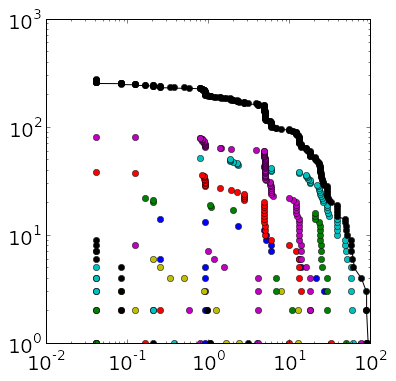

In [261]:
r = np.unique(df_repo_created_aw['repo'].values,return_counts=True)
o = np.argsort(r[1])

for X in r[0][o]:
    x,y = rankorder(df_repo_created_aw[df_repo_created_aw['repo']==X]['diff_hours'])
    loglog(x/24.,y,'o')
    
x,y = rankorder(df_repo_created_aw['diff_hours'])
loglog(x/24.,y,'ko-')

13.9571428571 6.06025863259
14.4202898551 5.97678066875
14.2857142857 5.35361788791
13.7285714286 5.18492713428
13.5 5.98987240503
8.71428571429 3.61403161162
7.02857142857 3.07975615255


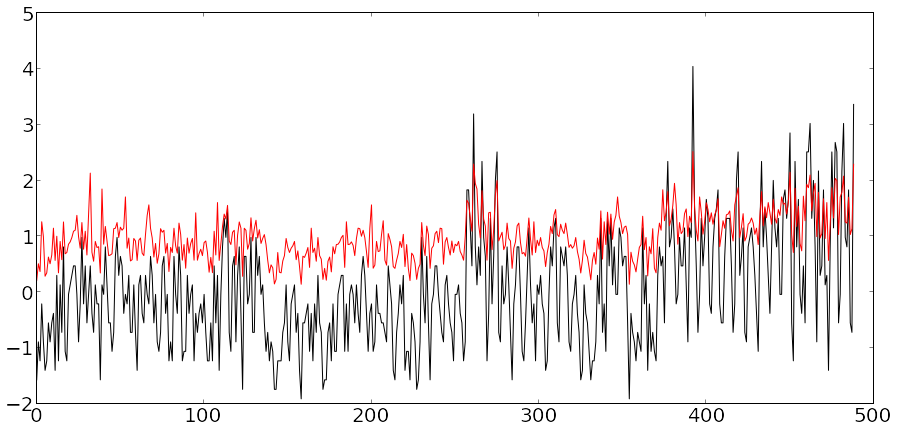

In [72]:
'''Non-paramtric daily detrending'''
test = resampled['repos']
correctedTimeSeries = test.values.copy()
wkd = test.index.weekday
dailyActivity = {}
correctedTimeSeries = np.array(map(float,test.values.copy()))
for wday in np.unique(wkd):
    dailyActivity[wday] = np.mean(test.values[wkd==wday])
    print dailyActivity[wday],np.std(test.values[wkd==wday])
    #print correctedTimeSeries[wkd==wday]
    correctedTimeSeries[wkd==wday] = correctedTimeSeries[wkd==wday]/float(dailyActivity[wday])
    #print correctedTimeSeries[wkd==wday]
    
figure(1,(15,7))
plot((test.values-np.mean(test.values))/np.std(test.values),'k-')
plot(correctedTimeSeries,'r-')

### Contribution Activity
Number of events per actor before and after the starting of AstroWeek2014

In [68]:
user_df = prepareUserDf(df)

#### Distribution of Contributions
for the following periods : **before**, **during** and **after** AstroWeek 2014.

event_count_before
event_count_during
event_count_after


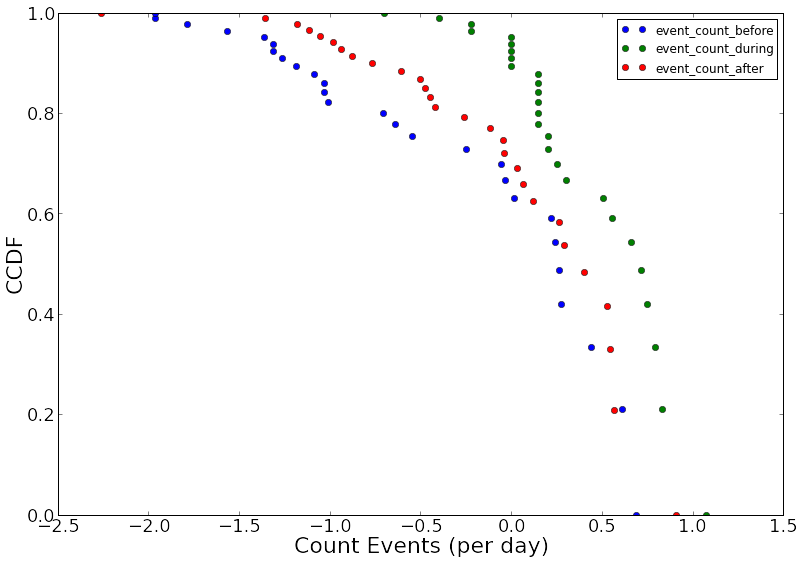

In [83]:
pl.figure(1,(13,9))
periods = ['event_count_before','event_count_during','event_count_after']
colors = {'event_count_before': 'blue',
          'event_count_during': 'green',
          'event_count_after' :'red'}

day_count = [184.,5.,182.]
#days_before = 184
#days_after = 182

minx = 150
dicMinCCDF = {"event_count_before" : minx ,
           "event_count_during": 5,
           "event_count_after": minx
           }

for i,p in enumerate(periods):
    print p
    data = user_df[p].values
    data = data[data>0]
    x,y = rankorder(data)
    
    x = np.array(x) / day_count[i]
    
    lx = np.log10(x)
    ly = np.log10(y)
    ly = ly/float(ly[-1])
    
    #lxmin = lx[x> dicMinCCDF[p]][-1]
    #lymin = ly[x> dicMinCCDF[p]][-1]
    
    pl.plot(lx,ly,'o',label=p,color=colors[p])
    #fit = pwlaw_fit_disc(x,dicMinCCDF[p])
    
    #print lymin-fit[0]*lx
    
    #pl.plot(lx,-fit[0]*lx + (lymin +fit[0]*lxmin)  ,'k',color=colors[p])
    #print fit

pl.ylim(0,1)
#pl.xlim(0,1.5)
pl.legend(loc=0)
pl.xlabel("Count Events (per day)")
pl.ylabel("CCDF")